In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_data = pd.read_csv('/kaggle/input/titanic/train.csv')
test_data = pd.read_csv('/kaggle/input/titanic/test.csv')

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
women = train_data.loc[train_data.Sex == 'female']['Survived']
print('Women survived',sum(women)/len(women))

men = train_data.loc[train_data.Sex == 'male']['Survived']
print('Men survived',sum(men)/len(men))

Women survived 0.7420382165605095
Men survived 0.18890814558058924


In [5]:
train_data['female'] = pd.get_dummies(train_data['Sex'])['female']
test_data['female'] = pd.get_dummies(test_data['Sex'])['female']

In [6]:
sum(train_data['Age'].isnull())
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())

<AxesSubplot:xlabel='Age', ylabel='Count'>

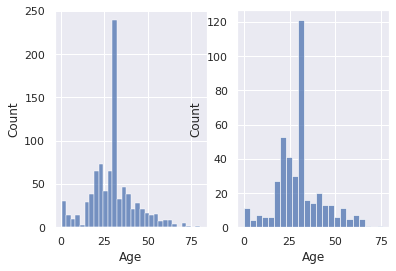

In [7]:
plt.subplot(1,2,1)
sns.histplot(train_data.Age)
plt.subplot(1,2,2)
sns.histplot(test_data.Age)

In [8]:
high_fare = train_data.loc[train_data.Fare > 100]['Survived']
print('High fare survivors',sum(high_fare)/len(high_fare))
low_fare = train_data.loc[train_data.Fare < 32]['Survived']
print('High fare survivors',sum(low_fare)/len(low_fare))

High fare survivors 0.7358490566037735
High fare survivors 0.3176470588235294


In [9]:
pclass1 = train_data.loc[train_data.Pclass == 1]['Survived']
print('Class1',sum(pclass1)/len(pclass1))
pclass2 = train_data.loc[train_data.Pclass == 2]['Survived']
print('Class2',sum(pclass2)/len(pclass2))
pclass3 = train_data.loc[train_data.Pclass == 3]['Survived']
print('Class3',sum(pclass3)/len(pclass3))

Class1 0.6296296296296297
Class2 0.47282608695652173
Class3 0.24236252545824846


In [10]:
sum(test_data.Pclass.isna())

0

In [11]:
train_data['class1'] = pd.get_dummies(train_data.Pclass)[1]
test_data['class1'] = pd.get_dummies(test_data.Pclass)[1]
train_data['class2'] = pd.get_dummies(train_data.Pclass)[2]
test_data['class2'] = pd.get_dummies(test_data.Pclass)[2]

In [12]:
sum(test_data.SibSp.isna())

0

In [13]:
sibs = train_data.loc[train_data.SibSp <= 1]['Survived']
print(sum(sibs)/len(sibs))
train_data['many_sibs'] = (train_data.SibSp > 1)*1
test_data['many_sibs'] = (test_data.SibSp > 1)*1

0.39412484700122397


In [14]:
young = train_data.loc[train_data.Age <= 15]['Survived']
print(sum(young)/len(young))

old = train_data.loc[train_data.Age >=40]['Survived']
print(sum(old)/len(old))

0.5903614457831325
0.37423312883435583


In [15]:
bins = [0.42, 15, 30, 50,80]
train_data['bin_age'] = pd.cut(x=train_data.Age, bins=bins)
test_data['bin_age'] = pd.cut(x=test_data.Age, bins=bins)

In [16]:
train_data['young'] = pd.get_dummies(train_data.bin_age).iloc[:,0]
test_data['young'] = pd.get_dummies(test_data.bin_age).iloc[:,0]
train_data['senior'] = pd.get_dummies(train_data.bin_age).iloc[:,3]
test_data['senior'] = pd.get_dummies(test_data.bin_age).iloc[:,3]

In [17]:
train_data.corr()['Survived']

features = ['Pclass', 'Fare', 'female', 'class1', 'class2', 'many_sibs', 'young', 'senior']

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
X = train_data[features]
y = train_data.Survived
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [20]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
y_pred

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1])

In [21]:
accuracy_score(y_pred, y_test)

0.7796610169491526

In [22]:
confusion_matrix(y_pred, y_test)

array([[154,  35],
       [ 30,  76]])

In [23]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
accuracy_score(y_pred, y_test)

0.8033898305084746

In [25]:
confusion_matrix(y_pred, y_test)

array([[159,  33],
       [ 25,  78]])

In [26]:
test_data.Fare = test_data.Fare.fillna(test_data.Fare.mean())

In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
#CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv= 5)
#CV_rfc.fit(X_train, y_train)

In [28]:
#CV_rfc.best_params_

In [29]:
rfc1=RandomForestClassifier(random_state=42, max_features='log2', n_estimators= 200, max_depth=6, criterion='entropy')
rfc1.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=6, max_features='log2',
                       n_estimators=200, random_state=42)

In [30]:
predictions = rfc1.predict(test_data[features])
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
